In [13]:
from datasets import load_from_disk
import pandas as pd

In [29]:
dataset_path = "../tmp/data/train_val_GO_skimmed_processed"
dataset_old = load_from_disk(dataset_path)

print(dataset_old['train'])

for x in range(10):
    print(dataset_old['train'][x]['GO Sentence'])
    print(dataset_old['train'][x]['sequence'])
    print()

Dataset({
    features: ['identifier', 'term', 'aspect', 'GO Name', 'GO Sentence', 'sequence', 'species', '__index_level_0__', 'sequence_processed', 'input_ids_sequence', 'attention_mask_sequence', 'input_ids_text', 'attention_mask_text'],
    num_rows: 44098
})
The biological process is positive regulation of tyrosine phosphorylation of STAT protein.
MRCPGVSLWGLLCLGAAAGGGRPVRLEGLRADARALTRTLSTRLQQLQLFPLTLRLSGLEGVPEGVPEGVPEGGVPPGLGWAAQRLQLFQRLLGALPGPDPRLAQVANDLENLRSLLALLGTLLGCPPPRDPRPPPPAPLAEAPHTVAGVALARLRRCLDGVAACLEGVPAC

The biological process is regulation of calcium ion binding.
MGDISTIGLQVQMVSLVKFFRNIGLIFGNLHCQDARASVSRKSKISASRKLMLKSLMVAKAKEEIEQEIVDKEEEKERYLAERAPTLQTGGMSFAELQELCRELHAKVDVVDEERYDIEAKVMHNTREIKDLNIKVLDLRGKFKRPSLRRVRVSADAILRSLLGSKHKVSMDLRANLKSVKKEDTEKEKTVEVSDWRKNVEAMSGMEGRKKMFDAAKGTPQ

The biological process is negative regulation of NIK/NF-kappaB signaling.
MGLCVVLLLFFLLAAVAVKVFDIDLALLFRGVFKCCGRSEDGKVYDAYVVYQMDGLDQEREEKVYHFVSIVLPTVLEKKCGFRLFIHGRDDLPGEDNMELVEDCMRLSRRLIVI

In [44]:
pd.DataFrame(pd.DataFrame(dataset_old['train']['GO Sentence']).value_counts())


,count
0,
The cellular component is intracellular anatomical structure.,3297
The molecular function is protein binding.,3228
The cellular component is cytoplasm.,2447
The cellular component is nucleus.,1359
The cellular component is nuclear lumen.,907
...,...
"The biological process is 5,6,7,8-tetrahydromethanopterin biosynthetic process.",1
The biological process is 5-phosphoribose 1-diphosphate biosynthetic process.,1
The biological process is 5S class rRNA transcription by RNA polymerase III.,1


In [45]:
dataset_path = "../tmp/data/protein_go_concatenated"
dataset_new = load_from_disk(dataset_path)

print(dataset_new)

print(dataset_new['train'])

for x in range(1000):
    print(dataset_new['train'][x]['sentences'])
    print(dataset_new['train'][x]['sequences'])
    print()


DatasetDict({
    train: Dataset({
        features: ['proteins', 'sequences', 'sentences'],
        num_rows: 55408
    })
    test: Dataset({
        features: ['proteins', 'sequences', 'sentences'],
        num_rows: 6157
    })
})
Dataset({
    features: ['proteins', 'sequences', 'sentences'],
    num_rows: 55408
})
transcription cis-regulatory region binding, compound eye development, negative regulation of RNA metabolic process, system development, sensory organ morphogenesis, regulation of nucleic acid-templated transcription, compound eye morphogenesis, imaginal disc-derived appendage morphogenesis, multicellular organismal process, animal organ morphogenesis, imaginal disc development, cellular anatomical entity, regulation of metabolic process, sequence-specific double-stranded DNA binding, gland development, eye-antennal disc development, negative regulation of nucleobase-containing compound metabolic process, appendage development, biological regulation, nucleus, negative r

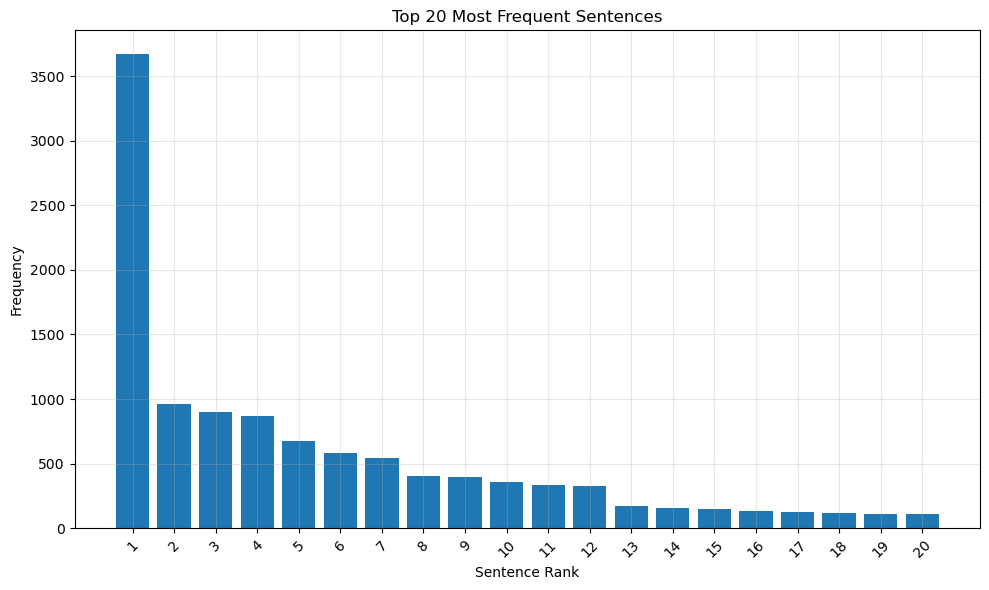


Top 5 most frequent sentences:

Count: 3671
Sentence: molecular_function, protein binding, binding.

Count: 961
Sentence: cellular_component, cytoplasm, cellular anatomical entity, intracellular anatomical structure.

Count: 901
Sentence: intracellular anatomical structure, intracellular membrane-bounded organelle, cellular anatomical entity, organelle, membrane-bounded organelle, cytoplasm, intracellular organelle, cellular_component, mitochondrion.

Count: 868
Sentence: plasma membrane, cellular anatomical entity, cell periphery, membrane, cellular_component.

Count: 678
Sentence: intracellular anatomical structure, cellular anatomical entity, cytoplasm, cytosol, cellular_component.


In [40]:
import matplotlib.pyplot as plt

# Get value counts of all sentences
label_counts = pd.DataFrame(dataset_new['train']['sentences']).value_counts().reset_index()
label_counts.columns = ['sentence', 'count']

# Sort by count in descending order
label_counts = label_counts.sort_values('count', ascending=False)

# Plot top 20 most frequent sentences
plt.figure(figsize=(10,6))
plt.bar(range(20), label_counts['count'][:20])
plt.xticks(range(20), range(1,21), rotation=45)
plt.xlabel('Sentence Rank')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Sentences')

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTop 5 most frequent sentences:")
for i, row in label_counts.head().iterrows():
    print(f"\nCount: {row['count']}")
    print(f"Sentence: {row['sentence']}")


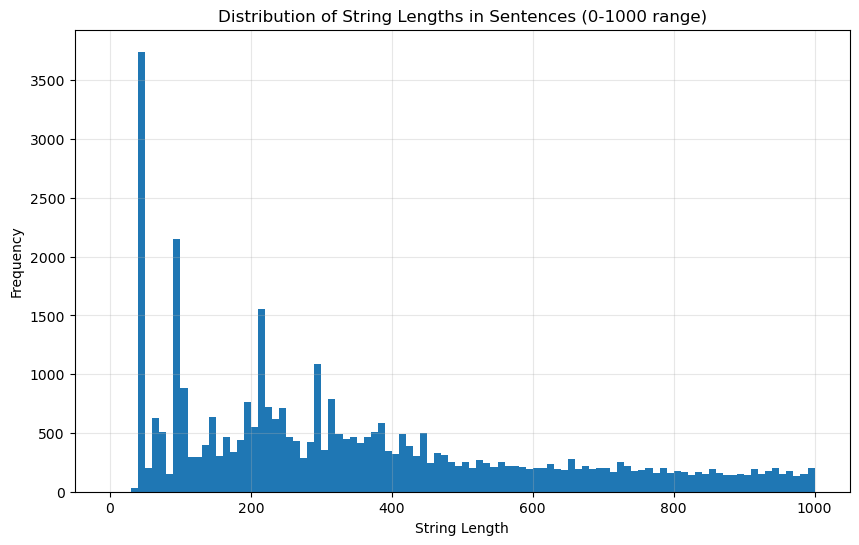

Length statistics:
Mean: 976.0
Min: 31
Max: 22616
Number of sentences <= 1000 chars: 36895 (66.6%)
Median length: 516


In [37]:
# Calculate lengths of strings
lengths = [len(s) for s in dataset_new['train']['sentences']]

# Create histogram plot focused on 0-1000 range
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

# Filter lengths <= 1000 and create histogram with more bins
lengths_filtered = [l for l in lengths if l <= 1000]
plt.hist(lengths_filtered, bins=100, range=(0,1000))
plt.xlabel('String Length')
plt.ylabel('Frequency') 
plt.title('Distribution of String Lengths in Sentences (0-1000 range)')

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.show()

# Print detailed statistics
print("Length statistics:")
print(f"Mean: {sum(lengths)/len(lengths):.1f}")
print(f"Min: {min(lengths)}")
print(f"Max: {max(lengths)}")
print(f"Number of sentences <= 1000 chars: {len(lengths_filtered)} ({len(lengths_filtered)/len(lengths)*100:.1f}%)")
print(f"Median length: {sorted(lengths)[len(lengths)//2]}")

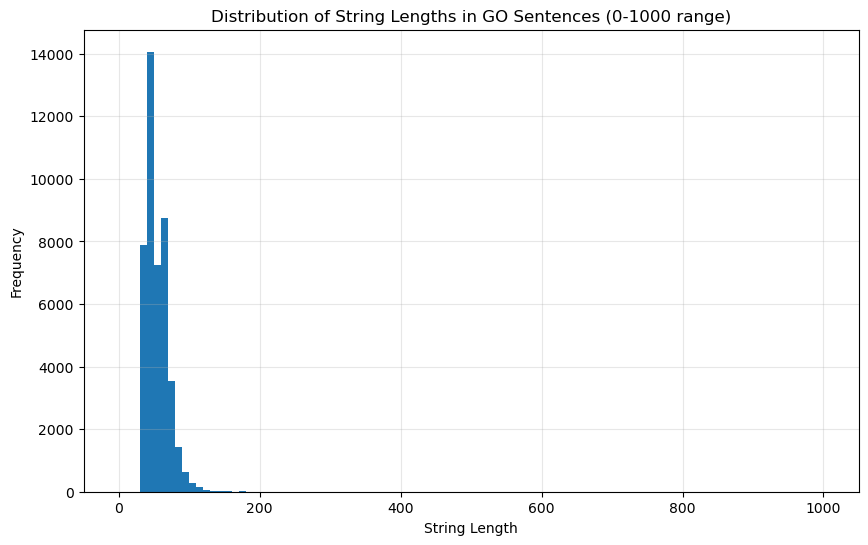

Length statistics:
Mean: 53.1
Min: 31
Max: 213
Number of sentences <= 1000 chars: 44098 (100.0%)
Median length: 50


In [36]:
# Calculate lengths of strings
lengths = [len(s) for s in dataset_old['train']['GO Sentence']]

# Create histogram plot focused on 0-1000 range
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

# Filter lengths <= 1000 and create histogram with more bins
lengths_filtered = [l for l in lengths if l <= 1000]
plt.hist(lengths_filtered, bins=100, range=(0,1000))
plt.xlabel('String Length')
plt.ylabel('Frequency') 
plt.title('Distribution of String Lengths in GO Sentences (0-1000 range)')

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.show()

# Print detailed statistics
print("Length statistics:")
print(f"Mean: {sum(lengths)/len(lengths):.1f}")
print(f"Min: {min(lengths)}")
print(f"Max: {max(lengths)}")
print(f"Number of sentences <= 1000 chars: {len(lengths_filtered)} ({len(lengths_filtered)/len(lengths)*100:.1f}%)")
print(f"Median length: {sorted(lengths)[len(lengths)//2]}")
